In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from matplotlib import animation
import numpy as np

64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64


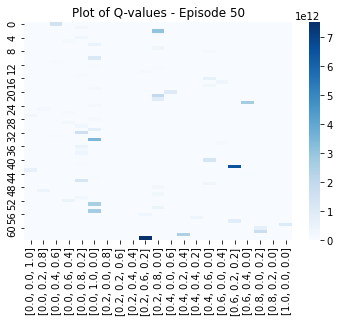

In [5]:
def get_states():
    states = []
    pdir = np.array([0,1])
    pmag = np.array([0,1])

    for i0 in pdir:
        for i1 in pmag:
            for i2 in pdir:
                for i3 in pmag:
                    for i4 in pdir:
                        for i5 in pmag:
                            sub = [i0, i1, i2, i3, i4, i5]
                            states.append(str(sub))
    return states

def get_actions(granularity=0.2):
    possible = []
    for i in np.linspace(0, 1, int(1 / granularity + 1)).tolist():
        possible.append(round(i,1))    
    actions = []
    for x in possible:
        for y in possible:
            for z in possible:
                if x + y + z == 1:
                    actions.append([x, y, z])
    return actions

def get_Q(path):
    with open(path, "rb") as fp:
        Q = pickle.load(fp)
    labels = list(Q.keys())
    
#     for i in range(len(labels)):
#         labels[i] = ast.literal_eval(labels[i])
    values = []
    for label in labels:
        values.append(Q[str(label)])
    return labels, values

def animate(p):
    global i
    plt.clf()
    actions = get_actions()
    states, values = get_Q(f"Models/Q/Q{i}.pickle")
#     print(len(states))
    states = get_states()
#     print(len(states))
#     for i in range(len(states)):
    print(len(values))
#         states[i] = str(states[i])
    ax = sns.heatmap(values, cmap="Blues")
#     ax.set_yticklabels(states)
    ax.set_xticklabels(actions, rotation = 90)
    ax.set_title(f"Plot of Q-values - Episode {i + 1}")
    i += 1


def animate_Q():
#     plt.rcParams["figure.figsize"] = (72, 20)
    fig = plt.figure()
    actions = get_actions()
    labels, values = get_Q(f"Models/Q/Q0.pickle")
    ax = sns.heatmap(values, cmap="Blues")
    ax.set_title(f"Plot of Q-values - Episode 1", fontsize=64)
    global i
    i = 1

    anim = animation.FuncAnimation(fig, animate, frames=48, repeat=True)

    savefile = f"Models/Q/Q.gif"
    pillowwriter = animation.PillowWriter(fps=5)
    anim.save(savefile, writer=pillowwriter)
    plt.show()

animate_Q()